In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from textblob import TextBlob


In [2]:
dat=pd.read_csv(r'C:\Users\HARGUN\OneDrive\Desktop\nlp task\train.csv')

In [3]:
dat.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<AxesSubplot:xlabel='target', ylabel='count'>

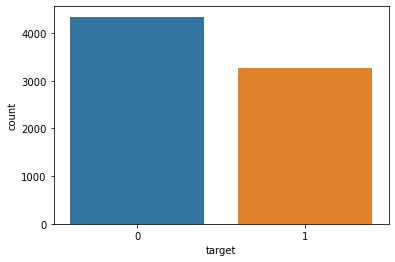

In [4]:
sns.countplot(x='target',data = dat)

In [5]:
dat['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [6]:
blob=TextBlob(dat['text'][0])

In [7]:
blob=' '.join(blob.words)

In [8]:
blob

'Our Deeds are the Reason of this earthquake May ALLAH Forgive us all'

In [9]:
# removing punctuations
for i in range(len(dat)):
    dat.loc[i,'text']=' '.join(TextBlob(dat['text'][i]).words)

In [10]:
dat.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place are b...,1
3,6,NaN,NaN,"13,000 people receive wildfires evacuation ord...",1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1


In [11]:
for i in range(len(dat)):
    normalized=[]
    x=dat['text'][i]
    x=word_tokenize(x)
    for word in x:
        if(word.isalpha()):
            z=WordNetLemmatizer().lemmatize(word,'v')
            normalized.append(z)
    dat.loc[i,'text']=' '.join(normalized)

In [12]:
dat

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds be the Reason of this earthquake May...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents ask to in place be be notify by ...,1
3,6,NaN,NaN,people receive wildfires evacuation order in C...,1
4,7,NaN,NaN,Just get send this photo from Ruby Alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant crane hold a bridge collapse into ne...,1
7609,10870,NaN,NaN,TheTawniest The out of control wild fire in Ca...,1
7610,10871,NaN,NaN,UTC S of Volcano Hawaii http,1
7611,10872,NaN,NaN,Police investigate after an collide with a car...,1


In [13]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
for i in range(len(dat)):
    x=word_tokenize(dat.loc[i,'text'])
    filt_sent=[z for z in x if not z in stopwords.words('english')]
    dat.loc[i,'text']=' '.join(filt_sent)

In [15]:
dat

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds Reason earthquake May ALLAH Forgive us,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents ask place notify officer No evac...,1
3,6,NaN,NaN,people receive wildfires evacuation order Cali...,1
4,7,NaN,NaN,Just get send photo Ruby Alaska smoke wildfire...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant crane hold bridge collapse nearby ho...,1
7609,10870,NaN,NaN,TheTawniest The control wild fire California e...,1
7610,10871,NaN,NaN,UTC S Volcano Hawaii http,1
7611,10872,NaN,NaN,Police investigate collide car Little Portugal...,1


In [16]:
test=pd.read_csv(r'C:\Users\HARGUN\OneDrive\Desktop\nlp task\test.csv')

In [17]:
for i in range(len(test)):
    test.loc[i,'text']=' '.join(TextBlob(test['text'][i]).words)

In [18]:
for i in range(len(test)):
    normalized=[]
    x=test['text'][i]
    x=word_tokenize(x)
    for word in x:
        if(word.isalpha()):
            z=WordNetLemmatizer().lemmatize(word,'v')
            normalized.append(z)
    test.loc[i,'text']=' '.join(normalized)

In [19]:
for i in range(len(test)):
    x=word_tokenize(test.loc[i,'text'])
    filt_sent=[z for z in x if not z in stopwords.words('english')]
    test.loc[i,'text']=' '.join(filt_sent)

In [20]:
wordlist=[]
for i in range(len(dat)):
    x=word_tokenize(dat.loc[i,'text'])
    for j in x:
        wordlist.append(j)


In [21]:
for i in range(len(test)):
    x=word_tokenize(test.loc[i,'text'])
    for j in x:
        wordlist.append(j)

In [22]:
se=pd.Series(wordlist)

In [23]:
len(se)

110111

In [24]:
len(se.unique())

21949

In [25]:
uni=se.unique()

In [26]:
dict_uni={}
for i in range(1,len(uni)+1):
    dict_uni[uni[i-1]]=i

In [27]:
for i in dict_uni:
    print(dict_uni[i])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815


5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448


8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379
8380
8381
8382
8383
8384
8385
8386
8387
8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400
8401
8402
8403
8404
8405
8406
8407
8408
8409
8410
8411
8412
8413
8414
8415
8416
8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512


10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
1050

13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
1319

15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
1594

18809
18810
18811
18812
18813
18814
18815
18816
18817
18818
18819
18820
18821
18822
18823
18824
18825
18826
18827
18828
18829
18830
18831
18832
18833
18834
18835
18836
18837
18838
18839
18840
18841
18842
18843
18844
18845
18846
18847
18848
18849
18850
18851
18852
18853
18854
18855
18856
18857
18858
18859
18860
18861
18862
18863
18864
18865
18866
18867
18868
18869
18870
18871
18872
18873
18874
18875
18876
18877
18878
18879
18880
18881
18882
18883
18884
18885
18886
18887
18888
18889
18890
18891
18892
18893
18894
18895
18896
18897
18898
18899
18900
18901
18902
18903
18904
18905
18906
18907
18908
18909
18910
18911
18912
18913
18914
18915
18916
18917
18918
18919
18920
18921
18922
18923
18924
18925
18926
18927
18928
18929
18930
18931
18932
18933
18934
18935
18936
18937
18938
18939
18940
18941
18942
18943
18944
18945
18946
18947
18948
18949
18950
18951
18952
18953
18954
18955
18956
18957
18958
18959
18960
18961
18962
18963
18964
18965
18966
18967
18968
18969
18970
18971
18972
18973
18974
1897

21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21186
21187
21188
21189
21190
21191
21192
21193
21194
21195
21196
21197
21198
21199
21200
21201
21202
21203
21204
21205
21206
21207
21208
21209
21210
21211
21212
21213
21214
21215
21216
21217
21218
21219
21220
21221
21222
21223
21224
21225
21226
21227
21228
21229
21230
21231
21232
21233
21234
21235
21236
21237
21238
21239
21240
21241
21242
21243
21244
21245
21246
21247
21248
21249
21250
21251
21252
21253
21254
21255
21256
21257
21258
21259
21260
21261
21262
21263
21264
21265
21266
21267
21268
21269
21270
21271
21272
21273
21274
21275
21276
21277
21278
2127

In [28]:
trainlis=[]
for i in range(len(dat)):
    z=word_tokenize(dat.loc[i,'text'])
    for j in range(len(z)):
        z[j]=dict_uni[z[j]]
    trainlis.append(z)

In [29]:
testlis=[]
for i in range(len(test)):
    z=word_tokenize(test.loc[i,'text'])
    for j in range(len(z)):
        z[j]=dict_uni[z[j]]
    testlis.append(z)

In [30]:
trainlis

[[1, 2, 3, 4, 5, 6, 7, 8],
 [9, 10, 11, 12, 13, 14, 15],
 [16, 17, 18, 19, 20, 21, 22, 23, 24, 19, 25, 26],
 [27, 28, 29, 23, 25, 30],
 [31, 32, 33, 34, 35, 36, 37, 29, 38, 39],
 [40, 41, 30, 42, 43, 44, 45, 46, 47, 10, 48, 29],
 [49, 50, 51, 52, 53, 54, 49, 55, 56, 57, 58, 59],
 [60, 61, 62, 60, 63, 10, 64],
 [65, 66, 23, 67, 68, 69, 70],
 [60, 71, 72, 73, 74],
 [75, 27, 76, 77, 78, 79],
 [80,
  81,
  82,
  32,
  49,
  83,
  84,
  85,
  86,
  60,
  87,
  88,
  89,
  90,
  91,
  92,
  60,
  93,
  94,
  95,
  91,
  92,
  60,
  93,
  94,
  95,
  96,
  49],
 [52, 49, 97, 98, 82, 99, 60, 100, 101],
 [102, 103, 104, 105, 106, 103],
 [107, 39, 108, 109, 110, 111, 112],
 [113, 114],
 [60, 115, 116],
 [117, 118],
 [119, 110, 120],
 [113, 121],
 [122],
 [123, 124],
 [125, 126],
 [113, 127, 128],
 [129],
 [22, 130, 60, 131, 132, 133],
 [134, 135, 136, 137],
 [125, 138],
 [139],
 [140, 141, 142],
 [143, 144],
 [145, 146, 147, 148, 149],
 [105, 150, 151, 152, 153, 154, 155, 149],
 [156, 157, 158, 

In [31]:
testlis

[[31, 67, 2544, 110, 111],
 [6383, 4, 4626, 4324, 2835, 5019, 702],
 [8506, 10, 3963, 15000, 17456, 4316, 69, 70, 60, 1187],
 [1273, 1572, 1690, 29],
 [7076, 7077, 570, 5661, 7078],
 [105, 10830, 253, 4],
 [319, 3730, 572, 970, 248, 5229, 1517, 1585, 17457],
 [992, 240],
 [113, 1794, 2732],
 [5639],
 [22, 60, 141, 4839],
 [17458, 140],
 [22, 472],
 [113],
 [7087],
 [7583, 146, 3400, 148, 6660, 1933, 1858, 2662, 7583, 146, 3400, 149],
 [17459, 258, 1059, 2901, 148],
 [17460, 17461, 16246, 5759, 161, 12136, 3153, 148, 149],
 [205, 149, 149, 149, 149, 206],
 [10927, 380, 17462, 17463, 3251, 17464, 3251, 148],
 [17465, 2290, 148, 17466, 17467, 352, 17468],
 [1818, 265, 190, 17469, 17470, 149, 766, 17471],
 [2793,
  3964,
  4124,
  703,
  223,
  679,
  911,
  3582,
  3016,
  13485,
  3351,
  937,
  161,
  585,
  148,
  4237],
 [2025, 826, 76, 161, 148, 85, 1744, 76, 242, 6030, 161, 149],
 [17472, 17473, 176, 149],
 [17474,
  757,
  1338,
  5853,
  845,
  17475,
  161,
  148,
  128,
  3119,


In [32]:
trainliscop=trainlis

In [33]:
testliscop=testlis

In [34]:
a=0
for i in range(len(trainlis)):
    if(a<len(trainlis[i])):
        a=len(trainlis[i])

In [35]:
a

28

In [36]:
for i in range(len(testlis)):
    if(a<len(testlis[i])):
        a=len(testlis[i])

In [37]:
a

28

In [38]:
for i in range(len(trainlis)):
    for j in range(a-len(trainlis[i])):
        trainlis[i].append(0)

In [39]:
for i in range(len(testlis)):
    for j in range(a-len(testlis[i])):
        testlis[i].append(0)

In [40]:
len(testlis[5])

28

In [41]:
output=[]
for i in range(len(dat)):
    output.append(dat.loc[i,'target'])

In [42]:
for i in range(len(trainlis)):
    trainlis[i]=np.array(trainlis[i])

In [43]:
for i in range(len(testlis)):
    testlis[i]=np.array(testlis[i])

In [44]:
testlis

[array([  31,   67, 2544,  110,  111,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]),
 array([6383,    4, 4626, 4324, 2835, 5019,  702,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]),
 array([ 8506,    10,  3963, 15000, 17456,  4316,    69,    70,    60,
         1187,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]),
 array([1273, 1572, 1690,   29,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]),
 array([7076, 7077,  570, 5661, 7078,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   

In [45]:
trainlis

[array([1, 2, 3, 4, 5, 6, 7, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([ 9, 10, 11, 12, 13, 14, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([16, 17, 18, 19, 20, 21, 22, 23, 24, 19, 25, 26,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([27, 28, 29, 23, 25, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([31, 32, 33, 34, 35, 36, 37, 29, 38, 39,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([40, 41, 30, 42, 43, 44, 45, 46, 47, 10, 48, 29,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([49, 50, 51, 52, 53, 54, 49, 55, 56, 57, 58, 59,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([60, 61, 62, 60, 63, 10, 64,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0

In [46]:
output=np.ravel(output)

In [93]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,Lambda

In [94]:
X, x_test, Y, y_test = train_test_split(trainlis, output, test_size=0.2, random_state = 42)

In [95]:
len(y_test)

1523

In [96]:
X=np.array(X)
Y=np.array(Y)
Y=Y.reshape(-1,1)
x_test=np.array(x_test)
y_test=np.ravel(y_test)
y_test=y_test.reshape(-1,1)

In [143]:
embedding_size=128
model=Sequential()
model.add(Embedding(21950, embedding_size, input_length=28))
model.add(LSTM(200, return_sequences=True,recurrent_dropout=0.3))
model.add(Dropout(0.3))


model.add(Dense(1, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01,l2=0.01),bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.01,l2=0.01)))
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
model.fit(X, Y, validation_data=(x_test, y_test), batch_size=64, epochs=2)

Epoch 1/2
96/96 [==============================] - 29s 247ms/step - loss: 0.7929 - accuracy: 0.6325 - val_loss: 0.5785 - val_accuracy: 0.7774
Epoch 2/2
96/96 [==============================] - 23s 234ms/step - loss: 0.4342 - accuracy: 0.8771 - val_loss: 0.5611 - val_accuracy: 0.7706


In [136]:
testlis=np.array(testlis)

In [137]:
sample=pd.read_csv(r'C:\Users\HARGUN\OneDrive\Desktop\nlp task\sample_submission.csv')

In [138]:
sample

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [139]:
sample=sample.set_index('id')

In [142]:
predictionforsubmission=model.predict(testlis)

k=0
for i in sample.index:
    if(predictionforsubmission[k]<=0.5):
        sample.loc[i,'target']=0
    else:
        sample.loc[i,'target']=1
    k=k+1
sample.to_csv(r'C:\Users\HARGUN\OneDrive\Desktop\nlp task\sample_submission_final.csv')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [66]:
len(sample)

5538

In [67]:
len(predictionforsubmission)

3263

In [ ]:
Y.shape